_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de), Moritz Becker (moritz.becker@phys.uni-goettingen.de), Florian Habenstein (florian.habenstein@mpibpc.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 07 - Wirtschaftswissenschaften: Mittelwert, Median und Standardabweichung
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 

Das Tutorial gliedert sich in
* [Mittelwert und Median](#mittelwert_und_median)  
* [Standardabweichung](#standardabweichung)

<a name="deskriptive_statistik"></a>1. Mittelwert und Median
---
Zur Vorbereitung laden wir wieder die Tabellen in ```DataFrames```:

In [3]:
# die Funktion "join()" brauchen wir, um Pfade im Dateisystem
# sicher zu handhaben
from os.path import join

# die Bibliothek Pandas liefert uns das DataFrame
import pandas as pd

# Dateiname 
fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'
fname_arbeiter = 'NumberofWorkersInvolvedinLabourDisputes_Broad.xlsx'
fname_tage = 'NumberofDaysLostinLabourDisputes_Broad.xlsx'

# lade die Datei als pandas DataFrame
streiks = pd.read_excel(join("daten/", fname_streiks), sheet_name='Data Long Format')
arbeiter = pd.read_excel(join("daten/", fname_arbeiter), sheet_name='Data Long Format')
tage = pd.read_excel(join("daten/", fname_tage), sheet_name='Data Long Format')

Die mittlere Anzahl an Streiks in einem spezifischen Jahr lässt sich folgendermaßen berechnen:

In [4]:
jahr = 1990
filter_jahr = streiks['year'] == jahr
streiks_jahr = streiks[filter_jahr]['value']
mean = streiks_jahr.mean()
print('Die mittlere Anzahl an Streiks im Jahr {} ist {:1.1f}.'.format(jahr, mean))

Die mittlere Anzahl an Streiks im Jahr 1990 ist 259.4.


**A.** Berechne die mittlere Anzahl an Streiks über alle Länder (für die Daten vorhanden sind) für die Zeitspanne zwischen 1970 und 2006. Speichere die Ergebnisse in einer Liste. Berechne auch den Median und speichere ihn ebenfalls in einer Liste.   

In [5]:
#Erzeuge zwei leere listen fuer die mean und median Daten
meanStreiks=[]
medianStreiks=[]

#Lege den zu analysierenden Zeitraum fest
Zeitraum=range(1970,2007)

#Iteriere durch den Zeitraum
for jahr in Zeitraum:
    
    #Erzeuge einen Filter für das Jahr
    filter_jahr = streiks['year'] == jahr
    streiks_jahr = streiks[filter_jahr]['value']
    
    #Füge Mittelwert und Median den Listen hinzu
    meanStreiks.append(streiks_jahr.mean()) 
    medianStreiks.append(streiks_jahr.median())


**B.** Visualisiere die mittlere Anzahl der Streiks in der oben genannten Zeitspanne als Zeitreihe (wie in Aufgabe **1.B**). Achte auf Titel, Achsenbeschriftungen und Legende. 

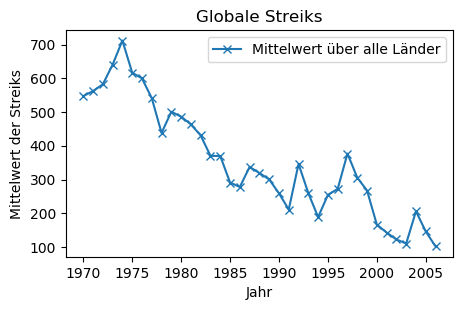

In [6]:
# importiere die für Visualisierungen benötigte Bibliothek
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,3), dpi=100)
plt.plot(Zeitraum, meanStreiks, 'x-', label='Mittelwert über alle Länder')
plt.xlabel('Jahr')
plt.ylabel('Mittelwert der Streiks')
plt.title('Globale Streiks')
plt.legend()

**C.** Visualisisere Verlauf des Mittelwerts und des Medians in der selben Abbildung. Was ist der Unterschied zwischen Mittelwert und Median und wie wirkt er sich auf deine Ergebnisse aus?  

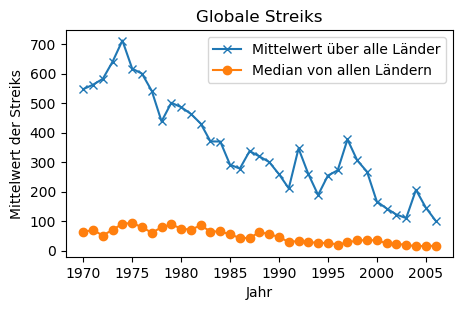

In [7]:
plt.figure(figsize=(5,3), dpi=100)
plt.plot(Zeitraum, meanStreiks, 'x-', label='Mittelwert über alle Länder')
plt.plot(Zeitraum, medianStreiks, 'o-', label='Median von allen Ländern')
plt.xlabel('Jahr')
plt.ylabel('Mittelwert der Streiks')
plt.title('Globale Streiks')
plt.legend()

* _Der Mittelwert ist definiert als die Summe aller Werte geteilt durch ihre Anzahl. Der Median ist der Wert, der genau in der Mitte der nach ihrer grösse geordneten Liste von Werten liegt. Dadurch werden "Ausreißer" im Datensatz bei der Bestimmung des Median weniger gewichtet. Der Unterschied zwischen Mittelwert und Median in unserem Fall ergibt sich also dadurch, dass es in einigen wenigen Ländern besonders viele Streiks gab. Als Beispiel können wir uns die Anzahl an Streiks für alle Länder im Jahr 1970 als Barplot ausgeben lassen._

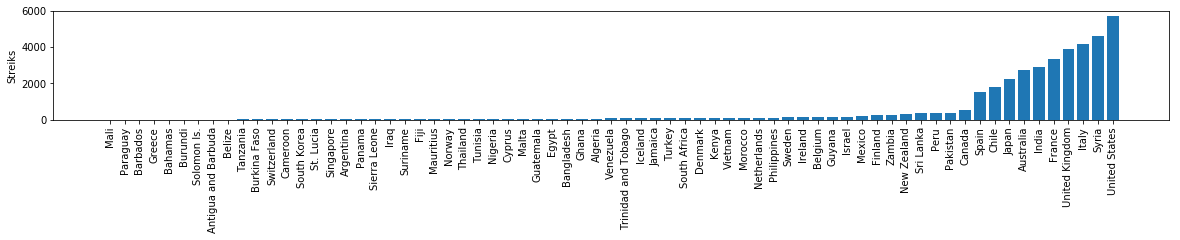

In [8]:
streiks_sortiert = streiks.sort_values(by=['value'],ascending=True)
filter_jahr = streiks_sortiert['year'] == 1970

plt.figure(figsize=(20,2))
plt.bar(streiks_sortiert[filter_jahr]['country.name'],\
        streiks_sortiert[filter_jahr]['value'])
plt.ylabel('Streiks')
plt.xticks(rotation='vertical');

[Anfang](#top)

**D.** Was für einem Trend folgt die mittlere Anzahl der Streiks? Lässt sich der selbe Trend in der Anzahl der streikenden Arbeiter und/oder der Anzahl der gestreikten Tage wiederfinden?  

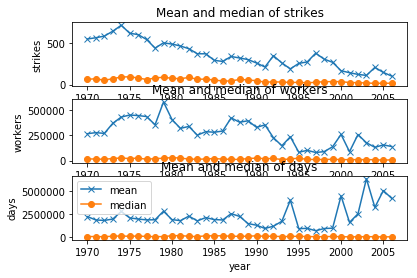

In [9]:
# Zeitraum, den wir betrachten
Zeitraum = list(range(1970,2007))

# errechne den Mittelwert und Median der Streiks
# im betrachteten Zeitraum
means_strikes = []
medians_strikes = []
for year in Zeitraum:
    filter_jahr = streiks['year'] == year
    streiks_jahr = streiks[filter_jahr]['value']
    means_strikes.append(streiks_jahr.mean())
    medians_strikes.append(streiks_jahr.median())

# errechne den Mittelwert und Median der streikenden
# Arbeiter im betrachteten Zeitraum
means_workers = []
medians_workers = []
for year in Zeitraum:
    filter_jahr = arbeiter['year'] == year
    arbeiter_jahr = arbeiter[filter_jahr]['value']
    means_workers.append(arbeiter_jahr.mean())
    medians_workers.append(arbeiter_jahr.median())

# errechne den Mittelwert und Median der Streiktage
# im betrachteten Zeitraum
means_days = []
medians_days = []
for year in Zeitraum:
    filter_jahr = tage['year'] == year
    tage_jahr = tage[filter_jahr]['value']
    means_days.append(tage_jahr.mean())
    medians_days.append(tage_jahr.median())

# im Folgenden plotten wir drein Abbildungen als
# "subplots" einer Abbildung. Das macht es in diesem
# Fall einfacher, die Trends zu vergleichen

# Streiks
plt.subplot(3,1,1)
plt.plot(Zeitraum, means_strikes, 'x-', label='mean')
plt.plot(Zeitraum, medians_strikes, 'o-', label='median')
plt.xlabel('year')
plt.ylabel('strikes')
plt.title('Mean and median of strikes')

# In Sreiks involvierte Arbeiter
plt.subplot(3,1,2)
plt.plot(Zeitraum, means_workers, 'x-', label='mean')
plt.plot(Zeitraum, medians_workers, 'o-', label='median')
plt.xlabel('year')
plt.ylabel('workers')
plt.title('Mean and median of workers')

# Arbeitstage
plt.subplot(3,1,3)
plt.plot(Zeitraum, means_days, 'x-', label='mean')
plt.plot(Zeitraum, medians_days, 'o-', label='median')
plt.xlabel('year')
plt.ylabel('days')
plt.title('Mean and median of days')  
plt.legend()

* _Die Anzahl der Streiks fällt mit Ausnahme von einigen kleineren lokalen Maxima seit den 70ern. Die Anzahl der streikenden Arbeiter fogt einem ähnlichen Trend. Die Anzahl der gestreikten Tage jedoch steigt seit den 90ern sogar etwas an._

**E.** Erstelle ein neues DataFrame, das für jedes Jahr die mittlere Anzahl an Streiks, Streiktagen und streikenden Arbeitern enthält. Speichere das DataFrame.

In [10]:
#Erstelle neues DataFrame
global_strikes = pd.DataFrame({'Jahr':list(Zeitraum), \
                             'Streiks':means_strikes, \
                             'Tage':means_days, \
                             'Arbeiter':means_workers})

#Speichern des neuen DataFrame im csv Format
global_strikes.to_csv('daten/global_strikes.csv', index=False) 
#Speichern des neuen DataFrame im Excel Format
global_strikes.to_excel('daten/global_strikes.xlsx', index=False) 

global_strikes.head()

,Jahr,Streiks,Tage,Arbeiter
0,1970,547.405797,2.218804e+06,266034.971014
1,1971,562.434783,1.857974e+06,276601.521739
2,1972,582.333333,1.807645e+06,269083.515152
3,1973,640.704918,1.956189e+06,368789.883333
4,1974,712.147541,2.773387e+06,430506.933333


**F.** Visualisiere die Anzahl der Streikenden bzw. die Anzahl der Streiktage pro Streik über die Zeit. Was für Trends kannst du ausmachen?  

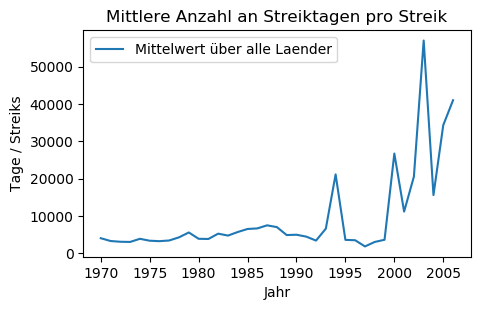

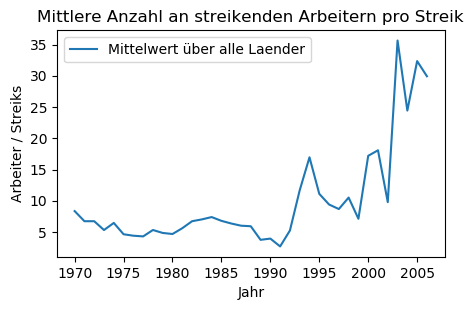

In [11]:
plt.figure(figsize=(5,3), dpi=100)
plt.plot(Zeitraum, global_strikes['Tage']/global_strikes['Streiks'], label='Mittelwert über alle Laender')
plt.xlabel('Jahr')
plt.ylabel('Tage / Streiks')
plt.title('Mittlere Anzahl an Streiktagen pro Streik')
plt.legend()

plt.figure(figsize=(5,3), dpi=100)
plt.plot(Zeitraum, global_strikes['Tage']/global_strikes['Arbeiter'], label='Mittelwert über alle Laender')
plt.xlabel('Jahr')
plt.ylabel('Arbeiter / Streiks')
plt.title('Mittlere Anzahl an streikenden Arbeitern pro Streik')
plt.legend()

* _Die Anzahl der Tage pro Streik war bis Anfang der 90er relativ konstant und steigt seitdem an, wobei die Daten jedoch stärkeren Schwankungen unterliegen._
* _Die Anzahl der Arbeiter pro Streik stieg bis Anfang der 90er an, erlebte dann einen starken Rueckgang und scheint seit 2000 wieder zu wachsen._ 
* _Die stärkeren Schwankungen in juengeren Jahren lassen sich mit der geringer werdenden Gesamtzahl an Streiks erklaeren. Wellen an Streiks (1995,2000,2002) sind zwar in ihrer Anzahl geringer, weisen jedoch eine größere Beteiligung auf (Die Bereitschaft zu streiken hat sich punktuel vervierfacht)._

**G. (optional)** Stelle eine Hypothese auf, um die Trends, die du in Aufgabe **2.F** gesehen hast, zu erklären. Was für Daten würdest du benötigen, um diese Hypothese zu überprüfen? Wo könntest du solche Daten finden? 

**H. (optional)** Beschaffe die Daten aus Aufgabe **2.G** und versuche, sie mit mit den Daten zu den Streiks zusammenzuführen. Versuche, deine Hypothese mit einer Visualisierung zu belegen oder zu widerlegen.

* _Eine Hypothese, um diese Entwicklung zu erklären wäre, dass im Verlauf der letzten Jahrzehnte viele Firmen zusammengelegt wurden und damit größere Firmen entstanden sind. Wird jetzt eine Firma bestreikt, dann erwischt es immer gleich viel mehr Leute auf einmal. Um diese Hypothese zu bestätigen oder zu widerlegen, bräuchte man Daten zur durchschnittlichen Firmengröße bzw. Anzahl der Mitarbeiter über die Jahre. Daten könnten vom Statistischen Bundesamt bezogen werden._

[Anfang](#top)

<a name="standardabweichung"></a>2. Standardabweichung
---
Die Standardabweichung der Streiks in einem Spezifischen Jahr lässt sich wie folgt berechnen:

In [12]:
jahr = 1990
filter_jahr = streiks['year'] == jahr
streiks_jahr = streiks[filter_jahr]['value']
std = streiks_jahr.std()
print('Die Standardabweichung der Streiks im Jahr {} ist {:1.1f}.'.format(jahr, std))

Die Standardabweichung der Streiks im Jahr 1990 ist 459.5.


**A.** Was ist die Bedeutung der Standardabweichung für den Streik-Datensatz? 

* _Die Standardabweichung ist ein Maß für die Streuung der Werte im Datensatz. In unserem Beispiel gibt sie also an, wie stark die länderspezifischen Zahlen an Streiks voneinander Abweichen (d.h. wie sehr die Streikzahlen über die Länder gestreut sind)._

**B.** Berechne die Standardabweichung der Streik-Anzahl für den Zeitraum zwischen 1970 und 2006 (wie den Mittelwert in Aufgabe **2.A**) und füge die Werte zum in Aufgabe **2.E** erstellten DataFrame hinzu.  

In [13]:
STDStreiks=[]
Zeitraum=range(1970,2007)
for jahr in Zeitraum:
    
    filter_jahr = streiks['year'] == jahr
    streiks_jahr = streiks[filter_jahr]['value']
        
    STDStreiks.append(streiks_jahr.std())

#Füge eine neue Spalte zum neuen DataFrame hinzu, welche die Standardabweichung enthält
global_strikes['STD'] = STDStreiks 
global_strikes.head()

global_strikes.to_csv('daten/global_strikes.csv', index=False) #Speichern im csv Format
global_strikes.to_excel('daten/global_strikes.xlsx', index=False) #Speichern im Excel Format


**C.** Visualisiere den zeitlichen Verlauf der Standardabweichung in der selben Abbildung wie den Mittelwert und den Median. Was fällt dir auf?  

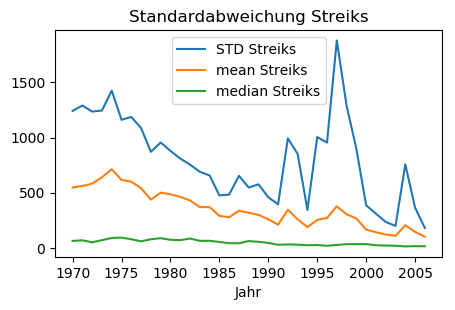

In [14]:
plt.figure(figsize=(5,3), dpi=100)
plt.plot(Zeitraum, STDStreiks, label='STD Streiks')
plt.plot(Zeitraum, meanStreiks, label='mean Streiks')
plt.plot(Zeitraum, medianStreiks, label='median Streiks')
plt.xlabel('Jahr')
plt.title('Standardabweichung Streiks')
plt.legend()

* _Während die mittlere Anzahl ans Streiks 1990 abnimmt, sinkt auch die Standardabweichung. Ab 1990 kommt es jedoch immer wieder zu Streikwellen, zeitgleich steigt auch die Standardabweichung. Das lässt darauf schließen, dass der Anstieg/die Wellen an Streiks durch einige wenige Länder verursacht werden, was zu einer erhöhten Streuung im Datensatz führt._

[Anfang](#top)

**D. (optional)** Berechne Mittelwert und Standardabweichung der Streiks für den Zeitraum 1970 bis 2006, aber diesmal für einzelne Länder (also: was ist die mittlere Anzahl an Streiks in Frankreich im Zeitraum zwischen 1970 und 2006?).  

Text(0,0.5,'$\\overline{Streiks}|_{1970-2006}$')

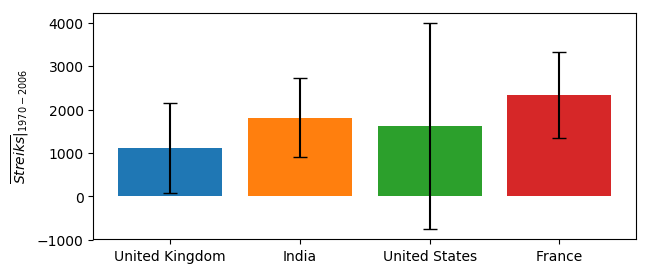

In [15]:
# numpy liefert eine Klasse für Vektoren (arrays)
# wir können Listen mit Hilfe der Funktion asarray(Liste)
# in Vektoren verwandeln und dann mit diesen Vektoren rechnen
import numpy as np

Zeitraum = range(1970,2007)
land_names = ['United Kingdom', 'India', 'United States', 'France']
filters_land = {land:streiks['country.name'] == land for land in land_names}

# Erstelle einen Filter, der nur die Jahre 1970 bis 2006 beruecksichtigt:
# Erzeuge zuerst einen Vektor der nur die boolesche Variable False enthaelt
filter_zeit = np.array([False] * len(streiks)) 

#Iteriere durch den Zeitraum 1970-2006
for year in Zeitraum: 
    #Setze die jahresspezifischen Filter-Elemente auf True
    filter_zeit[streiks['year'] == year] = True 

#Visualisiere die mittlere Streikzahl und Standardabweichung in einem Barplot:
plt.figure(figsize=(7,3), dpi=100)
for land in land_names:
    plt.bar(land, streiks[filter_zeit & filters_land[land]]['value'].mean(), \
            yerr=streiks[filter_zeit & filters_land[land]]['value'].std(), capsize=5)

plt.ylabel(r'$\overline{Streiks}|_{1970-2006}$')

**E. (optional)** Welche Länder haben im Zeitraum zwischen 1970 und 2006 mehr als 30 Datenpunkte? Welches dieser Länder hat die niedrigste mittlere Streikanzahl und welches die höchste? Welches Land hat die niedrigste Standardabweichung der Anzahl der Streiks, welches die höchste? Lassen sich diese Ergebnisse mit politischen Entwicklungen erklären? Wenn du ein Unternehmer wärst, was wäre dir wichtiger: eine niedrige mittlere Anzahl an Streiks oder eine niedrige Standardabweichung? Warum?

In [16]:
# betrachteter Zeitraum
Zeitraum=range(1970,2007)

# Erzeuge eine Liste mit sämtlichen Ländernamen aus dem Datensatz
land_names = streiks['country.name'].unique()

# erzeuge einen Filter für jedes Land
filters_land = {land:streiks['country.name'] == land for land in land_names}

# Erstelle einen Filter, der nur die Jahre 1970 bis 2006 berücksichtigt:
# Erzeuge einen Vektor der nur die boolesche Variable False enthält
filter_zeit = np.array([False] * len(streiks)) 

# Iteriere durch den Zeitraum 1970-2006
for year in Zeitraum: 
    #Setze die jahresspezifischen Filter-Elemente auf True
    filter_zeit[streiks['year'] == year] = True 


In [17]:
# Erstelle ein Dataframe das Mittelwert, Standardabweichung, 
# Land und Anzahl der Datenpunkte beinhaltet
mean = []
std = []
country = []
entries = []

for land in land_names:
    mean.append(streiks[filter_zeit & filters_land[land]]['value'].mean())
    std.append(streiks[filter_zeit & filters_land[land]]['value'].std())
    country.append(land)
    entries.append(len(streiks[filter_zeit & filters_land[land]]['value']))

datenpunkte = pd.DataFrame({'country.name':country, 'mean':mean, 'std': std, 'Datapoints': entries})

datenpunkte.head()

,country.name,mean,std,Datapoints
0,Argentina,434.000000,426.378353,9
1,Australia,1461.540541,828.854182,37
2,Austria,3.769231,3.444505,26
3,Belgium,135.080000,108.732822,25
4,Bulgaria,NaN,NaN,0


In [18]:
# Wo finden sich mehr als 30 Datenpunkte?
Filter1 = datenpunkte['Datapoints']>30 
print('Folgende Länder haben mehr als 30 Eintraege: \n {}'\
      .format(datenpunkte[Filter1]['country.name']))

#Von den Ländern mit mehr als 30 Datenpunkten hat welches die kleinste mittlere Anzahl an Streiks?
Filter2 = datenpunkte['mean'][Filter1]==min(datenpunkte['mean'][Filter1]) 
print('Mit {1:1.2f} hat {0} die niedrigste mittlere Streikzahl zwischen 1970 und 2006'\
      .format(datenpunkte[Filter1][Filter2]['country.name'].item(),datenpunkte[Filter1][Filter2]['mean'].item()))

#Von den Ländern mit mehr als 30 Datenpunkten hat welches die größte mittlere Anzahl an Streiks?
Filter3 = datenpunkte['mean'][Filter1]==max(datenpunkte['mean'][Filter1]) 
print('Mit {1:1.2f} hat {0} die höchste mittlere Streikzahl zwischen 1970 und 2006'\
      .format(datenpunkte[Filter1][Filter3]['country.name'].item(),datenpunkte[Filter1][Filter3]['mean'].item()))

# Von den Ländern mit mehr als 30 Datenpunkten hat welches die kleinste Standardabweichung in der Anzahl an Streiks?
Filter4 = datenpunkte['std'][Filter1]==min(datenpunkte['std'][Filter1]) 
print('Mit {1:1.2f} hat {0} die niedrigste Standardabweichung zwischen 1970 und 2006'\
      .format(datenpunkte[Filter1][Filter4]['country.name'].item(),datenpunkte[Filter1][Filter4]['std'].item()))

# Von den Ländern mit mehr als 30 Datenpunkten hat welches die größte Standardabweichung in der Anzahl an Streiks?
Filter5 = datenpunkte['std'][Filter1]==max(datenpunkte['std'][Filter1]) 
print('Mit {1:1.2f} hat {0} die höchste Standardabweichung zwischen 1970 und 2006'\
      .format(datenpunkte[Filter1][Filter5]['country.name'].item(),datenpunkte[Filter1][Filter5]['std'].item()))

Folgende Länder haben mehr als 30 Eintraege: 
 1                Australia
5                   Canada
7                  Denmark
9                  Finland
10                  France
13                   India
14                 Ireland
15                  Israel
16                   Italy
17                   Japan
19             Netherlands
20             New Zealand
21                  Norway
22             Philippines
25            South Africa
26                   Spain
27                  Sweden
28             Switzerland
29          United Kingdom
30           United States
32                  Mexico
34               Sri Lanka
35                 Jamaica
37               Singapore
38                Thailand
39                Pakistan
40                   Egypt
46                 Morocco
48     Trinidad and Tobago
49                  Cyprus
52                Barbados
57             South Korea
61               Mauritius
62                 Nigeria
68                 Tunisia
74      

* _Singpur ist zwar ein wohlhabender Staat mit starker Industrie, Gewerkschaften wie in Deutschland gibt es hier jedoch keine und strenge Gesetze erschweren/verbieten die Organsisation von Streiks. (https://www.zeit.de/1984/33/modell-der-hoffnung, https://de.wikipedia.org/wiki/Singapur)_
* _Frankreich wird nachgesagt eine ausgepraegtere Streikkultur als viele andere Länder zu besitzen. Gerade in letzter Zeit ist dies unter anderem an den Gelbwesten Protesten zu beobachten._
* _Die geringe Standardabweichung in Singapur lässt sich durch die insgesamt geringe Anzahl an Streiks in dem Land erklären._
* _Eine niedrigere Standardabweichung bedeutet potenziel auch eine bessere Möglichkeit das zukünfitige Aufkommen von Streiks vorauszusagen. Dies könnte fuer ein Unternehmen durchaus wichtig sein, da es so besser in Ausblick auf Arbeiterausfälle planen kann._
* _Eine zu hohe, wenn auch konsistente, mittlere Streikzahl ist für ein Unternehmen jedoch ungünstig, da es es den ständigen Ausfall an Mitarbeitern kompensieren muss._

[Anfang](#top)